<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/3-Analyse/Exercicios/Lista_5/01-concessionaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Uma empresa que vende carros possui duas unidades de vendas distintas.

Elas são bem diferentes quanto à região e ao número de funcionários, mas vendem os mesmos produtos.  
A loja **A** é a mais velha e bem estabelecida, com 50% mais vendedores do que a loja **B**.

A empresa quer padronizar o "jeito" da loja que dá mais resultado. Para isso, os dados foram extraídos da planilha  
**Green_Belt_FM2S_Lista_Exercícios_05**, aba **01.Vendas**.

| **Coluna da Worksheet** | **Descrição** |
|--------------------------|---------------|
| **Mês**     | Os meses relativos a cada análise. |
| **Vendas**  | O valor financeiro vendido. |
| **Loja**    | Se os valores correspondem à loja A ou à loja B. |

---

**Responda:**

**a)** As vendas das lojas são diferentes? Faça o gráfico de frequência apropriado para dizer.

**b)** A evolução das vendas é diferente? Quais são as diferenças? Avalie com análise no tempo apropriada.

**c)** A diferença entre as médias é estatisticamente significativa? Avalie com o Gráfico de Intervalos mais apropriado.

**d)** Qual loja deveria ter seus processos usados como referência?


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
!pip install matplotlib-venn
!pip install statannotations

In [46]:
url = '/content/[FM2S] Lista_Exercícios_5.xlsx'
pd.ExcelFile(url).sheet_names

['01.Vendas', '02.Cia_Aérea']

In [47]:
df = pd.read_excel(url, sheet_name=0)
print("\nPrimeiras linhas:")
print(df.head())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nInformações dos dados:")
print(df.info())


Primeiras linhas:
         Mês        Vendas Loja
0 2018-01-01  2.374695e+06    A
1 2018-02-01  2.157089e+06    A
2 2018-03-01  2.418011e+06    A
3 2018-04-01  2.347579e+06    A
4 2018-05-01  2.400975e+06    A

Estatísticas descritivas:
                       Mês        Vendas
count                   48  4.800000e+01
mean   2018-12-16 00:00:00  2.413117e+06
min    2018-01-01 00:00:00  1.901052e+06
25%    2018-06-23 12:00:00  2.376460e+06
50%    2018-12-16 12:00:00  2.430702e+06
75%    2019-06-08 12:00:00  2.491505e+06
max    2019-12-01 00:00:00  2.618360e+06
std                    NaN  1.411722e+05

Informações dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mês     48 non-null     datetime64[ns]
 1   Vendas  48 non-null     float64       
 2   Loja    48 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1

a) As vendas das lojas são diferentes? Faça o gráfico de frequência apropriado para dizer.

/tmp/ipython-input-48-4125639361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loja', y='Vendas', palette='Set2')


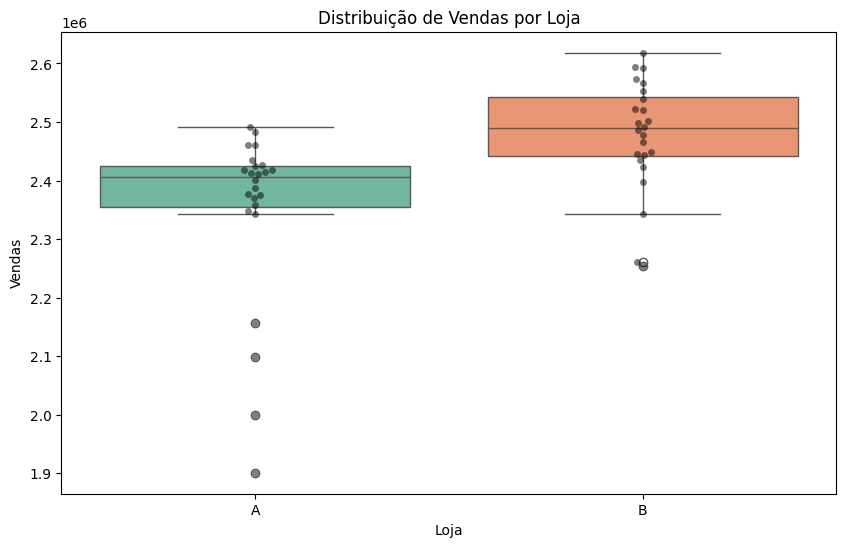

In [48]:
# Gráfico de frequência (boxplot + swarmplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Loja', y='Vendas', palette='Set2')
sns.swarmplot(data=df, x='Loja', y='Vendas', color='black', alpha=0.5)
plt.title('Distribuição de Vendas por Loja')
plt.show()

b) A evolução das vendas é diferente? Quais são as diferenças? Avalie com análise no tempo apropriada.

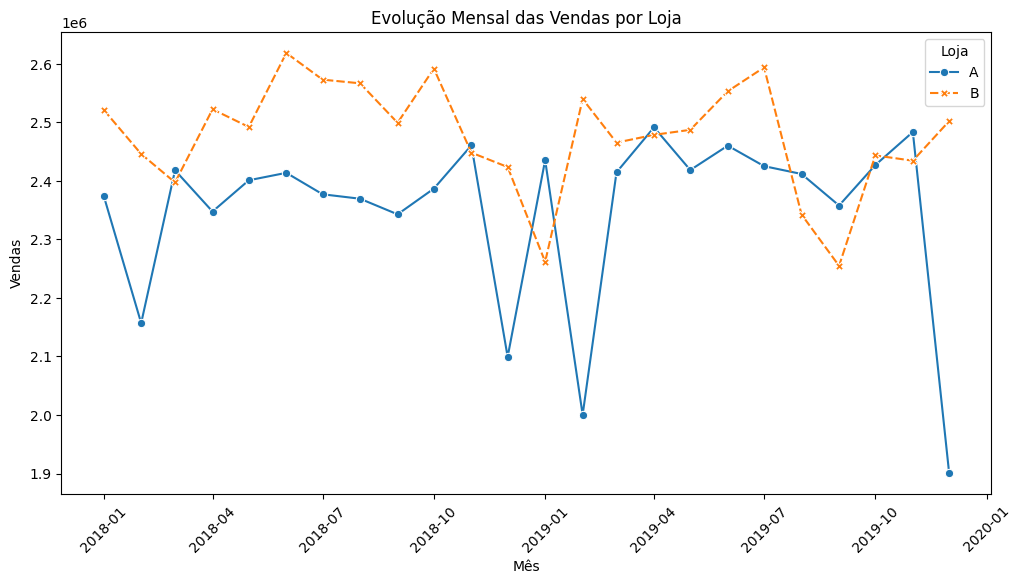

In [49]:
# Série temporal por loja
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Mês', y='Vendas', hue='Loja', style='Loja', markers=True)
plt.title('Evolução Mensal das Vendas por Loja')
plt.xticks(rotation=45)
plt.show()

c) A diferença entre as médias é estatisticamente significativa? Avalie com o Gráfico de Intervalos mais apropriado.

A vs. B: Custom statistical test, P_val:1.020e-03


/tmp/ipython-input-52-1126297735.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=df, x='Loja', y='Vendas', ci=95, capsize=0.1, palette='pastel')
/tmp/ipython-input-52-1126297735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Loja', y='Vendas', ci=95, capsize=0.1, palette='pastel')


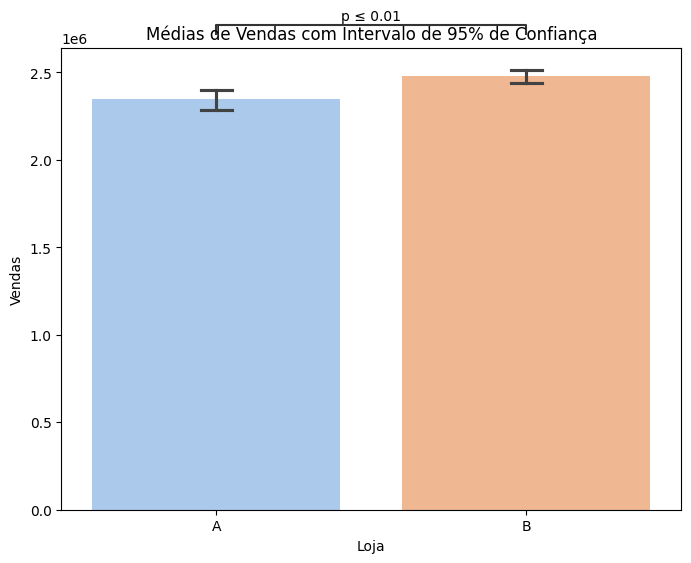

In [52]:
from statannotations.Annotator import Annotator
import scipy.stats as stats

# Gráfico de intervalos de confiança
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Loja', y='Vendas', ci=95, capsize=0.1, palette='pastel')

# Teste t e anotação
pairs = [("A", "B")]
p_value = stats.ttest_ind(
    df[df['Loja']=='A']['Vendas'],
    df[df['Loja']=='B']['Vendas']
).pvalue
annot = Annotator(ax, pairs, data=df, x='Loja', y='Vendas')
annot.configure(text_format='simple', loc='outside')
annot.set_pvalues([p_value])
annot.annotate()

plt.title('Médias de Vendas com Intervalo de 95% de Confiança')
plt.show()

d) Qual loja deveria ter seus processos usados como referência?

In [ ]:
resumo = df.groupby('Loja')['Vendas'].agg(['mean', 'std', 'count'])
resumo['CV'] = (resumo['std'] / resumo['mean']) * 100  # Coeficiente de Variação
print(resumo)